In [1]:
!pip install numpy==1.23.5 scipy==1.10.1 gensim==4.3.1  # Стабильные версии

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, 

# Текстовая модальность

In [47]:
import pandas as pd

In [49]:
data = pd.read_csv("/content/data.csv")
data

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Column1,data_id,start,end,...,arousal_3,fin_binery,fin_arousal,speech_characteristic,audio_paths,dominance_auto,emotions,dominance_1,dominance_2,dominance_3
0,7211,7211,7211,7211,7211,7211,7211,в2_гр2,"0,089","3,147",...,neut,neut,neut,9_4.444444444444445_1_2,dataset/2 Зоопарк/audio/в2_гр2/SPEAKER_02_0.09...,low,Апатия,neut,neut,neut
1,7212,7212,7212,7212,7212,7212,7212,в2_гр2,"4,092","5,304",...,act,neut,act,5_2.8_1_0,dataset/2 Зоопарк/audio/в2_гр2/SPEAKER_01_4.09...,neut,Нейтральное состояние,neut,low,low
2,7213,7213,7213,7213,7213,7213,7213,в2_гр2,"6,314","7,493",...,act,neut,act,6_3.3333333333333335_1_0,dataset/2 Зоопарк/audio/в2_гр2/SPEAKER_01_6.31...,high,Спокойная уверенность,neut,neut,neut
3,7214,7214,7214,7214,7214,7214,7214,в2_гр2,"7,796","21,427",...,neut,neut,neut,35_4.714285714285714_5_4,dataset/2 Зоопарк/audio/в2_гр2/SPEAKER_01_7.80...,neut,Нейтральное состояние,low,neut,low
4,7215,7215,7215,7215,7215,7215,7215,в2_гр2,"29,651","38,812",...,neut,neut,neut,30_4.433333333333334_7_3,dataset/2 Зоопарк/audio/в2_гр2/SPEAKER_02_29.6...,neut,Нейтральное состояние,neut,neut,neut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,4405,4405,4405,4405,4405,4405,4405,в5_общий,"1955,23","1955,39",...,neut,neut,neut,3_2.0_0_1,dataset/5_Субботники_готово/audio/в5_общий/SP...,low,Апатия,neut,neut,high
488,4406,4406,4406,4406,4406,4406,4406,в5_общий,"1963,55","1971,7",...,neut,neut,slow,26_3.423076923076923_5_1,dataset/5_Субботники_готово/audio/в5_общий/SP...,high,Спокойная уверенность,neut,neut,low
489,4407,4407,4407,4407,4407,4407,4407,в5_общий,"1973,56","1979,52",...,slow,neg,slow,21_4.0476190476190474_3_1,dataset/5_Субботники_готово/audio/в5_общий/SP...,high,Спокойная уверенность,low,neut,low
490,4408,4408,4408,4408,4408,4408,4408,в5_общий,"1983,99","1984,85",...,neut,pos,neut,7_2.2857142857142856_2_0,dataset/5_Субботники_готово/audio/в5_общий/SP...,low,Апатия,neut,neut,low


### Предобработка данных

Удаление стоп-слов и токенизация текста

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string  # для удаления пунктуации


nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('russian'))
punctuation = set(string.punctuation)  # множество знаков препинания

def preprocess_text(text):
    # Токенизация и приведение к нижнему регистру
    tokens = word_tokenize(text.lower())

    # Удаляем всё, что не буквы (цифры, пунктуацию, спецсимволы)
    tokens = [token for token in tokens if token.isalpha()]

    # Удаляем стоп-слова и пунктуацию
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation]

    # Опционально: применяем стемминг/лемматизацию
    # tokens = [stemmer.stem(token) for token in tokens]

    return tokens

# Применяем к данным
data['cleaned_tokens'] = data['text'].apply(preprocess_text)

# Проверяем результат
data[['text', 'cleaned_tokens']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text,cleaned_tokens
0,"Понимаю, что нам сейчас нужно подобрать аргуме...","[понимаю, нам, нужно, подобрать, аргументы]"
1,"Да, почему зоопарк?","[почему, зоопарк]"
2,Почему зоопарк — это плохо?,"[почему, зоопарк, это, плохо]"
3,И желательно с какими-то источниками подобрать...,"[желательно, источниками, подобрать, скажем, л..."
4,В целом из общих пунктов это в любом случае то...,"[целом, общих, пунктов, это, любом, случае, дв..."


Лемматизация

In [5]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 105.4 MB/s eta 0:00:00


In [6]:
import pymorphy3
morph = pymorphy3.MorphAnalyzer()

In [7]:
def lemmatize_tokens(tokens):
    return [morph.parse(token)[0].normal_form for token in tokens]

data['lemmas'] = data['cleaned_tokens'].apply(lemmatize_tokens)

data[['text', 'cleaned_tokens', 'lemmas']].head()

,text,cleaned_tokens,lemmas
0,"Понимаю, что нам сейчас нужно подобрать аргуме...","[понимаю, нам, нужно, подобрать, аргументы]","[понимать, мы, нужно, подобрать, аргумент]"
1,"Да, почему зоопарк?","[почему, зоопарк]","[почему, зоопарк]"
2,Почему зоопарк — это плохо?,"[почему, зоопарк, это, плохо]","[почему, зоопарк, это, плохо]"
3,И желательно с какими-то источниками подобрать...,"[желательно, источниками, подобрать, скажем, л...","[желательно, источник, подобрать, скажем, логи..."
4,В целом из общих пунктов это в любом случае то...,"[целом, общих, пунктов, это, любом, случае, дв...","[целое, общий, пункт, это, любой, случай, двер..."


In [8]:
data.to_csv("/content/prep_data.csv") # выгружаем обработанные данные

### Извлечение признаков из текста

Извлечение Word2vec-признаков

In [9]:
import gensim
from gensim.models import Word2Vec
import numpy as np
import zipfile
import logging

In [10]:
# Настройка логгирования (чтобы видеть процесс обучения)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Загрузка данных (
data = pd.read_csv("/content/prep_data.csv")

# Проверяем, что 'lemmas' - это списки, а не строки
if isinstance(data['lemmas'].iloc[0], str):
    print("Конвертируем строки в списки...")
    data['lemmas'] = data['lemmas'].apply(eval)  # если 'lemmas' сохранены как строки

# Проверяем данные
print("Пример лемм:", data['lemmas'].iloc[0])

Конвертируем строки в списки...
Пример лемм: ['понимать', 'мы', 'нужно', 'подобрать', 'аргумент']


In [11]:
# Обучение модели Word2Vec
w2v_model = Word2Vec(
    sentences=data['lemmas'],
    vector_size=100,     # размерность векторов слов
    window=5,
    min_count=2,
    workers=4,
    sg=1,
    epochs=10
)

In [12]:
def get_mean_vector(tokens):
    """
    Усреднение векторов Word2Vec для списка токенов.
    Возвращает нулевой вектор, если ни одно слово не найдено в модели.
    """
    # Получаем все векторы слов, которые есть в модели (за 1 проход)
    vectors = [w2v_model.wv[token] for token in tokens if token in w2v_model.wv]

    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(w2v_model.vector_size)

# Применяем к данным
data['word2vec'] = data['lemmas'].apply(get_mean_vector)

In [13]:
data['word2vec']= data['lemmas'].apply(get_mean_vector)

data[['text', 'lemmas', 'word2vec']].head()

,text,lemmas,word2vec
0,"Понимаю, что нам сейчас нужно подобрать аргуме...","[понимать, мы, нужно, подобрать, аргумент]","[-0.10532451, 0.09293796, -0.009185783, -0.020..."
1,"Да, почему зоопарк?","[почему, зоопарк]","[-0.09030008, 0.06780697, -0.0062810527, -0.01..."
2,Почему зоопарк — это плохо?,"[почему, зоопарк, это, плохо]","[-0.10819359, 0.086738616, -0.007310893, -0.01..."
3,И желательно с какими-то источниками подобрать...,"[желательно, источник, подобрать, скажем, логи...","[-0.077953234, 0.071661726, -0.009112812, -0.0..."
4,В целом из общих пунктов это в любом случае то...,"[целое, общий, пункт, это, любой, случай, двер...","[-0.117203645, 0.100827225, -0.011217266, -0.0..."


Извлечение Fasttext-признаков

In [14]:
from gensim.models import FastText

In [15]:
# обучаем FastText модель
ft_model = FastText(
    sentences=data['lemmas'],
    vector_size=100,     # размерность векторов
    window=5,
    min_count=2,
    workers=4,
    sg=1,
    epochs=10
)

In [16]:
def get_fasttext_vector(tokens, normalize=True):
    vectors = [ft_model.wv[token] for token in tokens if token in ft_model.wv]
    if len(vectors) == 0:
        return np.zeros(ft_model.vector_size)

    mean_vec = np.mean(vectors, axis=0)
    return mean_vec / np.linalg.norm(mean_vec) if normalize else mean_vec

In [17]:
data['fasttext'] = data['lemmas'].apply(get_fasttext_vector)

data[['text', 'lemmas', 'fasttext']].head()

,text,lemmas,fasttext
0,"Понимаю, что нам сейчас нужно подобрать аргуме...","[понимать, мы, нужно, подобрать, аргумент]","[-0.1132676, -0.03302962, 0.022096634, 0.06583..."
1,"Да, почему зоопарк?","[почему, зоопарк]","[-0.11342623, -0.03297137, 0.019743612, 0.0664..."
2,Почему зоопарк — это плохо?,"[почему, зоопарк, это, плохо]","[-0.112882406, -0.032603364, 0.020279689, 0.06..."
3,И желательно с какими-то источниками подобрать...,"[желательно, источник, подобрать, скажем, логи...","[-0.1130552, -0.0326836, 0.021236302, 0.067076..."
4,В целом из общих пунктов это в любом случае то...,"[целое, общий, пункт, это, любой, случай, двер...","[-0.11345374, -0.033137262, 0.020948138, 0.067..."


In [18]:
data.to_csv("/content/feature_data.csv") # выгружаем данные с признаками

### Обучение модели

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [20]:
data = pd.read_csv("/content/feature_data.csv") # загрузим файл с аннтотациями

In [21]:
# словарь для отображения категорий в числа
bin_map = {'neut': 0, 'neg': 1, 'pos': 1}

# заменим значения в столбце fin_valence
data['fin_binery'] = data['fin_binery'].map(bin_map)

data[['word2vec', 'fasttext', 'fin_binery']].head()

,word2vec,fasttext,fin_binery
0,[-0.10532451 0.09293796 -0.00918578 -0.020776...,[-0.1132676 -0.03302962 0.02209663 0.065832...,0
1,[-0.09030008 0.06780697 -0.00628105 -0.012919...,[-0.11342623 -0.03297137 0.01974361 0.066424...,0
2,[-0.10819359 0.08673862 -0.00731089 -0.012298...,[-0.11288241 -0.03260336 0.02027969 0.067807...,0
3,[-0.07795323 0.07166173 -0.00911281 -0.010702...,[-1.13055199e-01 -3.26835997e-02 2.12363023e-...,0
4,[-0.11720365 0.10082722 -0.01121727 -0.019163...,[-0.11345374 -0.03313726 0.02094814 0.067507...,0


In [22]:
# Функция безопасного преобразования строк в numpy-массив
def safe_parse_array(s):
    try:
        if pd.isna(s):
            return np.array([])
        cleaned = s.strip("[] \n")
        return np.array([float(i) for i in cleaned.split() if i])
    except:
        return np.array([])

# Применяем парсинг
data['word2vec'] = data['word2vec'].apply(safe_parse_array)
data['fasttext'] = data['fasttext'].apply(safe_parse_array)

In [23]:
# Объединение признаков
data['features'] = data.apply(lambda row: np.concatenate([row['word2vec'], row['fasttext']]), axis=1)

In [24]:
# Формирование X и y
X = np.vstack(data['features'].values)
y = data['fin_binery'].values

# Разделение на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [25]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=40)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=40)

In [26]:
# тестирование модели
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score:", round(f1, 4))

print(classification_report(y_test, y_pred))

F1-score: 0.5551
              precision    recall  f1-score   support

           0       0.59      0.55      0.57        53
           1       0.52      0.57      0.54        46

    accuracy                           0.56        99
   macro avg       0.56      0.56      0.56        99
weighted avg       0.56      0.56      0.56        99



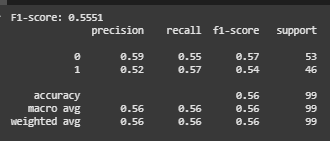

Анализ количества экземпларов классов в датасете

In [29]:
import matplotlib.pyplot as plt

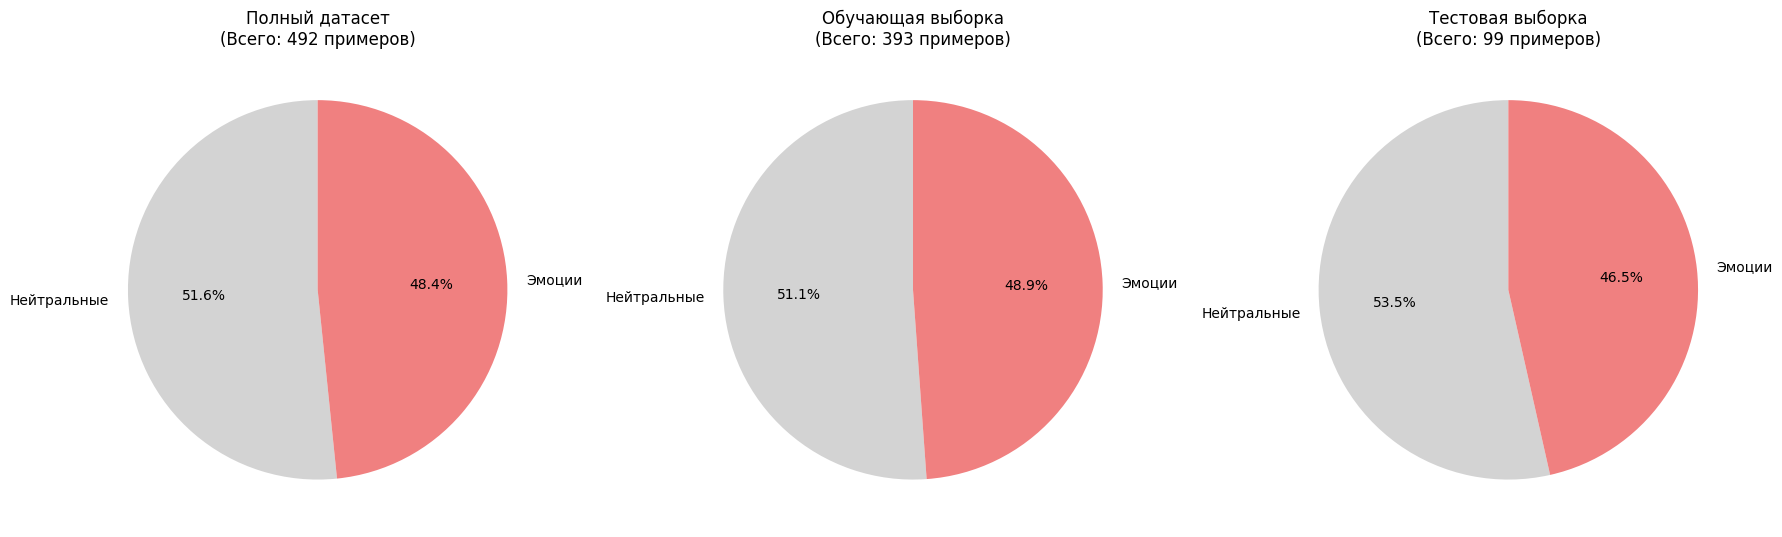

In [30]:
def plot_pie_charts(y, y_train, y_test):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    for i, (data, title) in enumerate(zip(
        [y, y_train, y_test],
        ["Полный датасет", "Обучающая выборка", "Тестовая выборка"]
    )):
        counts = np.bincount(data)
        ax[i].pie(counts, labels=["Нейтральные", "Эмоции"],
                 autopct='%1.1f%%', startangle=90,
                 colors=["lightgray", "lightcoral"])
        ax[i].set_title(f"{title}\n(Всего: {len(data)} примеров)")

    plt.tight_layout()
    plt.show()

plot_pie_charts(y, y_train, y_test)

# Аудио модальность

In [31]:
import zipfile
import librosa
import os
import librosa
import numpy as np

In [32]:
# Подключение к Google Диску
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
# Распаковка аудио файлов
with zipfile.ZipFile('/content/drive/MyDrive/models/proj/audio.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [34]:
# загрузка файла с разметкой
data = pd.read_csv("/content/feature_data.csv")

data = data.dropna(subset=['audio_paths'])
data['filename'] = data['audio_paths'].apply(lambda x: x.split('/')[-1]) # извлекаем названия аудио файлов

### Извлечение признаков

In [35]:
# Извлечение признаков из аудио
audio_features = []

for i, row in data.iterrows():
    fin_binery = row['fin_binery']

    filename = row['filename']
    full_path = f"/content/audio/{filename}"

    if os.path.exists(full_path):
        try:
            y, sr = librosa.load(full_path, sr=None)

            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20) # извлечение mfcc признаков
            mfcc_mean = mfcc.mean(axis=1) # её среднее
            mfcc_std = mfcc.std(axis=1) # её дисперсия

            audio_features.append({
                'filename': filename,
                'mfcc_mean': mfcc_mean,
                'mfcc_std': mfcc_std,
                'fin_binery': fin_binery
            })
        except Exception as e:
            print(f"Ошибка при обработке {filename}: {e}")
    else:
        print(f"Файл не найден: {full_path}")

/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1808
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=882
  warnings.warn(


In [36]:
df_audio = pd.DataFrame(audio_features)
df_audio

,filename,mfcc_mean,mfcc_std,fin_binery
0,SPEAKER_02_0.09_3.15.mp3,"[-401.5128, 155.62897, -11.789492, 20.135109, ...","[92.37412, 92.66285, 59.87928, 46.169064, 20.7...",neut
1,SPEAKER_01_4.09_5.30.mp3,"[-339.2671, 173.73653, -14.157568, 7.8001, 19....","[85.89685, 53.1603, 37.43642, 30.718163, 21.40...",neut
2,SPEAKER_01_6.31_7.49.mp3,"[-372.40808, 174.91766, 8.790877, 1.3183516, 1...","[65.94417, 57.12994, 48.38248, 42.33602, 33.03...",neut
3,SPEAKER_01_7.80_21.43.mp3,"[-405.127, 145.52261, 9.236066, 16.186811, 19....","[82.741486, 74.6256, 59.030132, 43.846645, 32....",neut
4,SPEAKER_02_29.65_38.81.mp3,"[-434.69653, 136.56761, 16.522753, 28.714142, ...","[92.453476, 83.56392, 56.162395, 44.63258, 32....",neut
...,...,...,...,...
484,SPEAKER_04_1955.23_1955.39.mp3,"[-293.83182, 205.98515, -38.416817, -6.819707,...","[75.50559, 20.963379, 23.269411, 19.512445, 13...",neut
485,SPEAKER_04_1963.55_1971.70.mp3,"[-414.0559, 132.85274, -13.235694, 9.6182375, ...","[116.51669, 80.568245, 43.993404, 33.337566, 3...",neut
486,SPEAKER_04_1973.56_1979.52.mp3,"[-377.43817, 147.07098, -15.333185, -0.9560136...","[93.96141, 71.38681, 53.678562, 37.805943, 28....",neg
487,SPEAKER_02_1983.99_1984.85.mp3,"[-315.56955, 157.70752, -17.40324, 41.715572, ...","[44.42137, 58.464653, 26.658886, 51.326664, 40...",pos


In [37]:
df_audio.to_csv("/content/audio_data.csv") # выгружаем данные с аудио признаками

### Обучение модели

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [39]:
data = pd.read_csv("/content/audio_data.csv") # загрузим файл с аннтотациями

In [41]:
# словарь для отображения категорий в числа
bin_map = {'neut': 0, 'neg': 1, 'pos': 1}

# заменим значения в столбце fin_valence
data['fin_binery'] = data['fin_binery'].map(bin_map)

data[['mfcc_mean', 'mfcc_std', 'fin_binery']].head()

,mfcc_mean,mfcc_std,fin_binery
0,[-401.5128 155.62897 -11.789492 20.1...,[92.37412 92.66285 59.87928 46.169064 2...,0
1,[-339.2671 173.73653 -14.157568 7.8...,[85.89685 53.1603 37.43642 30.718163 2...,0
2,[-372.40808 174.91766 8.790877 1.3...,[65.94417 57.12994 48.38248 42.33602 3...,0
3,[-4.0512701e+02 1.4552261e+02 9.2360659e+00 ...,[82.741486 74.6256 59.030132 43.846645 3...,0
4,[-434.69653 136.56761 16.522753 28.7...,[92.453476 83.56392 56.162395 44.63258 3...,0


In [42]:
# Функция безопасного преобразования строк в numpy-массив
def safe_parse_array(s):
    try:
        if pd.isna(s):
            return np.array([])
        cleaned = s.strip("[] \n")
        return np.array([float(i) for i in cleaned.split() if i])
    except:
        return np.array([])

# Применяем парсинг
data['mfcc_mean'] = data['mfcc_mean'].apply(safe_parse_array)
data['mfcc_std'] = data['mfcc_std'].apply(safe_parse_array)

In [43]:
# Объединение признаков
data['features'] = data.apply(lambda row: np.concatenate([row['mfcc_mean'], row['mfcc_std']]), axis=1)

In [44]:
# Формирование X и y
X = np.vstack(data['features'].values)
y = data['fin_binery'].values

# Разделение на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [45]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [46]:
# тестирование модели
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score:", round(f1, 4))

print(classification_report(y_test, y_pred))

F1-score: 0.4758
              precision    recall  f1-score   support

           0       0.54      0.58      0.56        55
           1       0.41      0.37      0.39        43

    accuracy                           0.49        98
   macro avg       0.48      0.48      0.48        98
weighted avg       0.48      0.49      0.49        98



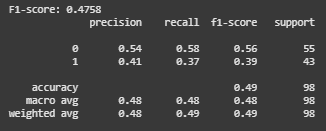